<a href="https://colab.research.google.com/github/EsterMariaPaul/Analysis/blob/main/breastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC,SVR
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error

In [ ]:
#SVM for classification
#load dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

In [ ]:
#split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#train SVM classifier
svm_clf = SVC(kernel='rbf', C=1.0)
svm_clf.fit(X_train, y_train)

SVC()

In [ ]:
#predictions
y_pred = svm_clf.predict(X_test)

In [ ]:
#classification accuracy
svm_accuracy = accuracy_score(y_test, y_pred)
print(f" SVM Classification Accuracy: {svm_accuracy:.4f}")

 SVM Classification Accuracy: 0.9825


In [ ]:
#svr for regression
#generate data
np.random.seed(42)
X_reg = np.linspace(0, 10, 100).reshape(-1, 1)
y_reg = np.sin(X_reg).ravel() + np.random.normal(scale=0.3, size=100)

In [ ]:
#split into train and test
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [ ]:
#normalize data
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

In [ ]:
#train SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_reg, y_train_reg)

SVR()

In [ ]:
#predictions
y_pred_reg = svr_model.predict(X_test_reg)

In [ ]:
#regression error(MSE)
svr_mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"SVR Meansquared Error: {svr_mse:.4f}")

SVR Meansquared Error: 0.0723


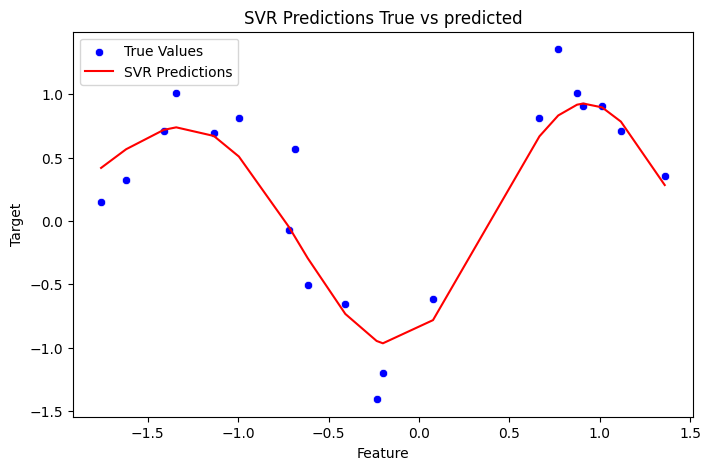

In [ ]:
#plot SVR predictions vs true value
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_test_reg.ravel(), y=y_test_reg, color='blue', label='True Values')
sns.lineplot(x=X_test_reg.ravel(), y=y_pred_reg, color='red', label='SVR Predictions')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("SVR Predictions True vs predicted")
plt.legend()
plt.show()